# Graph log_count
### Niklas Lantau

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import norm
import os

In [16]:
all_files = {}

pdir = r'/home/nlantau/.config/scripts/log_data'

for file in os.listdir(pdir):
    time_stamps = []
    for t in open(pdir + '/' + file):
        time_stamps.append(t.strip())
    all_files[file.replace('2021-','').replace('-','.').rstrip('.log')] = time_stamps

In [18]:
x_vals = []
y_vals = []
for i in sorted(all_files):
    y_vals.append(len(all_files[i]))
    x_vals.append(i)

In [19]:
x = np.array(y_vals).reshape((-1,1))
model = LinearRegression().fit(x, x_vals)
y_pred = model.predict(x)

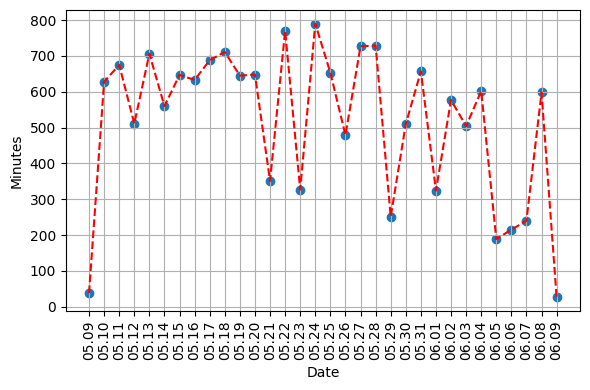

In [20]:
plt.figure(dpi=100)
plt.grid()
plt.xticks(rotation=90)
plt.ylabel('Minutes'); plt.xlabel('Date')
plt.scatter(x_vals, y_vals)
plt.plot(x_vals, y_vals, 'r--')
#plt.plot(y_pred, x, 'g')
plt.tight_layout()

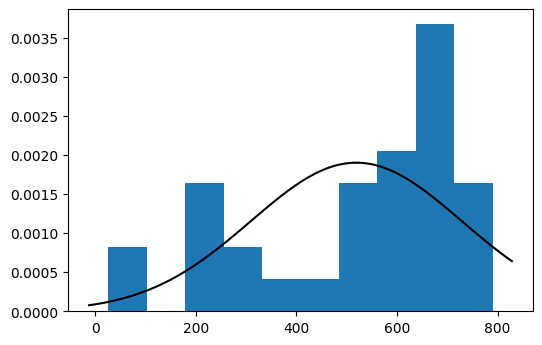

In [27]:
plt.figure(dpi=100)
plt.hist(y_vals, density=True)

# Fitted probability density function
mu, std = norm.fit(y_vals)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k')